# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID: Sai Charan Thannir - 1001635048 <-------only this student will upload the assignment


Team member name and ID: Jahnavi Nuthalapati - 1001827251

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA3'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA3.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA3'  

Step 4: Your submission folder should include ONLY the following files:
    * lastname_firstname_yourNetID_PA3.ipynb, 
    * dataset.csv,
    * fruits.csv
    * Apriori algorithm (.py file)


Step 5: Zip this folder and submit it on Canvas. Your final submission folder name should be 'lastname_firstname_yourNetID_PA3.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Groceries' dataset [01],
* and the Apriori Algorithm [02] (You can use the algorithm provided as reference)

Note:
* The algorithm to attached in the end, has to be reffered, and make sure to code it on your own.
* Any plagiarism detected will be subjected to additional consequences.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import your Libraries
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from IPython.display import Image


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset.csv' to look like the fruits.csv.  Each transaction is at one line with a variable length.  Discard the date attribute from your dataset.  

Export your modified dataset in a file named 'dataset_updated.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset_updated.csv'.


ScreenShot of the fruits.csv


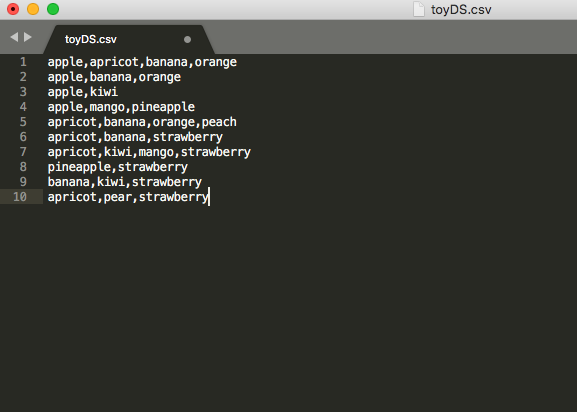

In [3]:
from IPython.display import Image
print ('ScreenShot of the fruits.csv')
Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #

#giving titles
titles=['dateOfPurchase','rowNumber','items']   
shoppingCartData = pd.read_csv('dataset.csv',header=None,names=titles)

#dropping specified columns
shoppingCartData=shoppingCartData.drop(['dateOfPurchase'],axis=1) 

new_shoppingCartData= pd.DataFrame
#making the items in one line according to transaction number and removing the dublicate entries
new_shoppingCartData = shoppingCartData.groupby('rowNumber').items.apply(set)

#saving the data to a new file
new_shoppingCartData.to_csv('dataset_out.csv', header=False, index=False)





In [5]:
# # #  Solution  # # #
displayCartData = pd.read_csv('dataset_out.csv',header=None)
pd.options.display.max_colwidth = 1000
displayCartData.head(7)



,0
0,"{'sandwich bags', 'shampoo', 'aluminum foil', 'beef', 'laundry detergent', 'flour', 'yogurt', 'lunch meat', 'butter', 'soap', 'all- purpose', 'vegetables', 'ice cream', 'pork', 'mixes', 'soda', 'dinner rolls'}"
1,"{'sandwich bags', 'shampoo', 'laundry detergent', 'aluminum foil', 'cereals', 'yogurt', 'waffles', 'milk', 'tortillas', 'toilet paper', 'individual meals', 'vegetables', 'dishwashing liquid/detergent', 'hand soap', 'mixes', 'cheeses'}"
2,"{'eggs', 'shampoo', 'poultry', 'spaghetti sauce', 'bagels', 'vegetables', 'ice cream', 'soda', 'dinner rolls', 'soap', 'lunch meat', 'milk', 'toilet paper', 'hand soap', 'pork', 'cheeses', 'cereals', 'ketchup', 'laundry detergent', 'sandwich loaves'}"
3,"{'cereals', 'lunch meat', 'toilet paper', 'all- purpose', 'juice', 'soda'}"
4,"{'eggs', 'poultry', 'spaghetti sauce', 'individual meals', 'vegetables', 'flour', 'soda', 'dinner rolls', 'yogurt', 'milk', 'toilet paper', 'pasta', 'hand soap', 'pork', 'paper towels', 'tortillas', 'mixes', 'waffles', 'all- purpose', 'sandwich loaves'}"
5,"{'eggs', 'shampoo', 'aluminum foil', 'poultry', 'butter', 'spaghetti sauce', 'bagels', 'vegetables', 'soap', 'milk', 'toilet paper', 'pasta', 'dishwashing liquid/detergent', 'paper towels', 'cereals', 'ketchup', 'coffee/tea', 'laundry detergent', 'all- purpose'}"
6,"{'eggs', 'beef', 'spaghetti sauce', 'individual meals', 'vegetables', 'ice cream', 'sandwich bags', 'soap', 'yogurt', 'milk', 'toilet paper', 'pasta', 'dishwashing liquid/detergent', 'paper towels', 'tortillas', 'ketchup', 'mixes', 'fruits', 'all- purpose', 'juice'}"


### Task 2: Implement apriory algorithm and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results.
(*) For those that are not familiar with python and coding this could be a quite demanding task.

* Use this as a reference to use the apriori algorithm.[https://github.com/asaini/Apriori]

You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning or observation as comments. 


In [6]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print('-----------------------------------------------------------------------------------------------------------')
print('After observing the support counts of each item in the given dataset we came to understanding that all the items expect\nvegetable are in range 0 to 0.421 support count and if the min-support exceeds 45percent then none of the items will be\nconsidered as frequent set item and no rules will generated.so, to skip this case we have considered the support values  which are less than 40 percent as minimum support')
print('-----------------------------------------------------------------------------------------------------------')
print ('Case 1 (minimum support=20 and minimum confidence=30)')

items, rules = runApriori(new_shoppingCartData, 0.2, 0.3)

print ('Case 1 Reasoning:\nApriori depends up on two values- support and confidence \nsupport means in how many number of transaction a particular item is present out of all transactions\nand if the item qualifies for minimum support it goes to frequent items\nconfidence shows how two or more items dependent on each other')
print('\nIn this case: min-support is 20% and min-confidece is 30%')
print('The min-confidence is 30% which means that, in a x->y rule, if x item set is already in the basket, there is 30% min-chance that y item set is also added to the basket.')

print ('Case 1 Output:')
printResults(items,rules)


# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
-----------------------------------------------------------------------------------------------------------
After observing the support counts of each item in the given dataset we came to understanding that all the items expect
vegetable are in range 0 to 0.421 support count and if the min-support exceeds 45percent then none of the items will be
considered as frequent set item and no rules will generated.so, to skip this case we have considered the support values  which are less than 40 percent as minimum support
-----------------------------------------------------------------------------------------------------------
Case 1 (minimum support=20 and minimum confidence=30)
Case 1 Reasoning:
Apriori depends up on two values- support and confidence 
support means in how many number of transaction a particular item is present out of all transactions
and if the item qualifies for minimum support it goes to frequent items
confidenc

Case 1 Visualization: Graph & Observations
visualizing Item vs Support for Task 2 Case 1


C:\Users\thann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


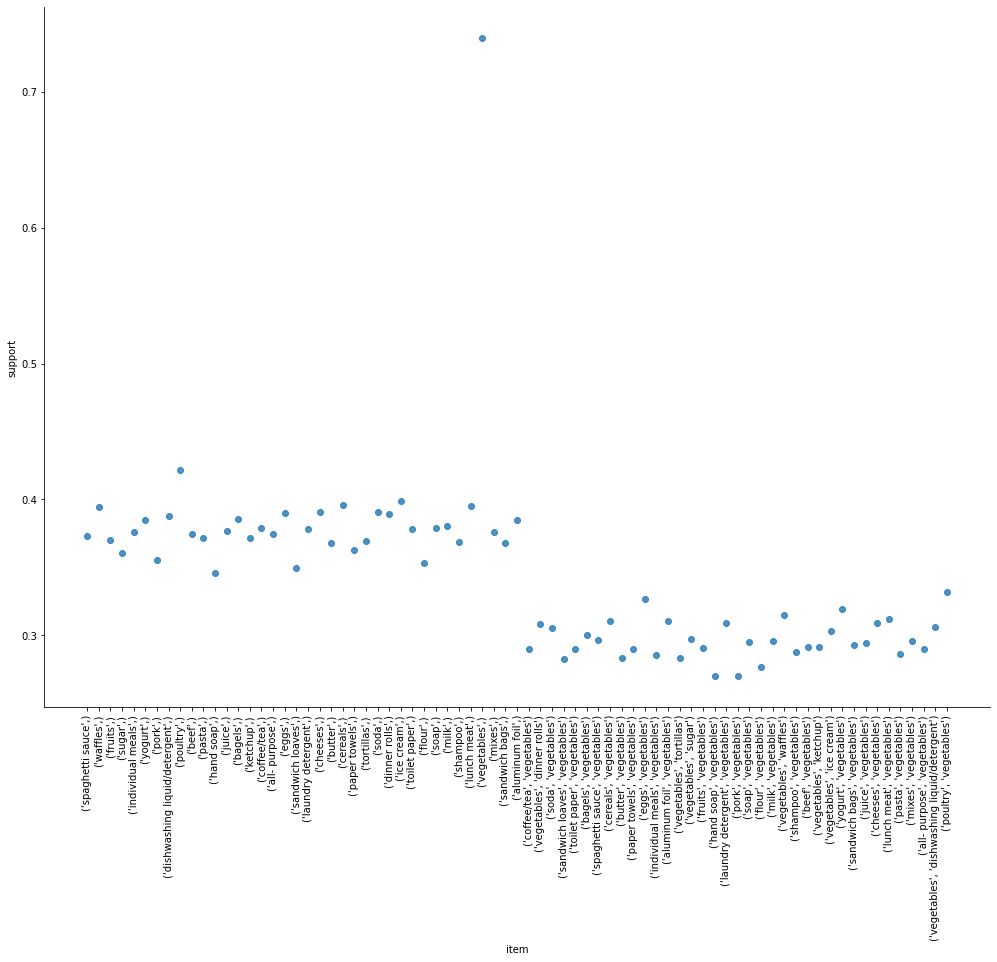

In [7]:
print ('Case 1 Visualization: Graph & Observations')
print('visualizing Item vs Support for Task 2 Case 1')

df = DataFrame (items,columns=['item','support'])
df["item"] = df["item"].astype(str)
facet  = sns.lmplot('item', 'support', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()


visualizing Rule vs Confidence for Task 2 Case 1


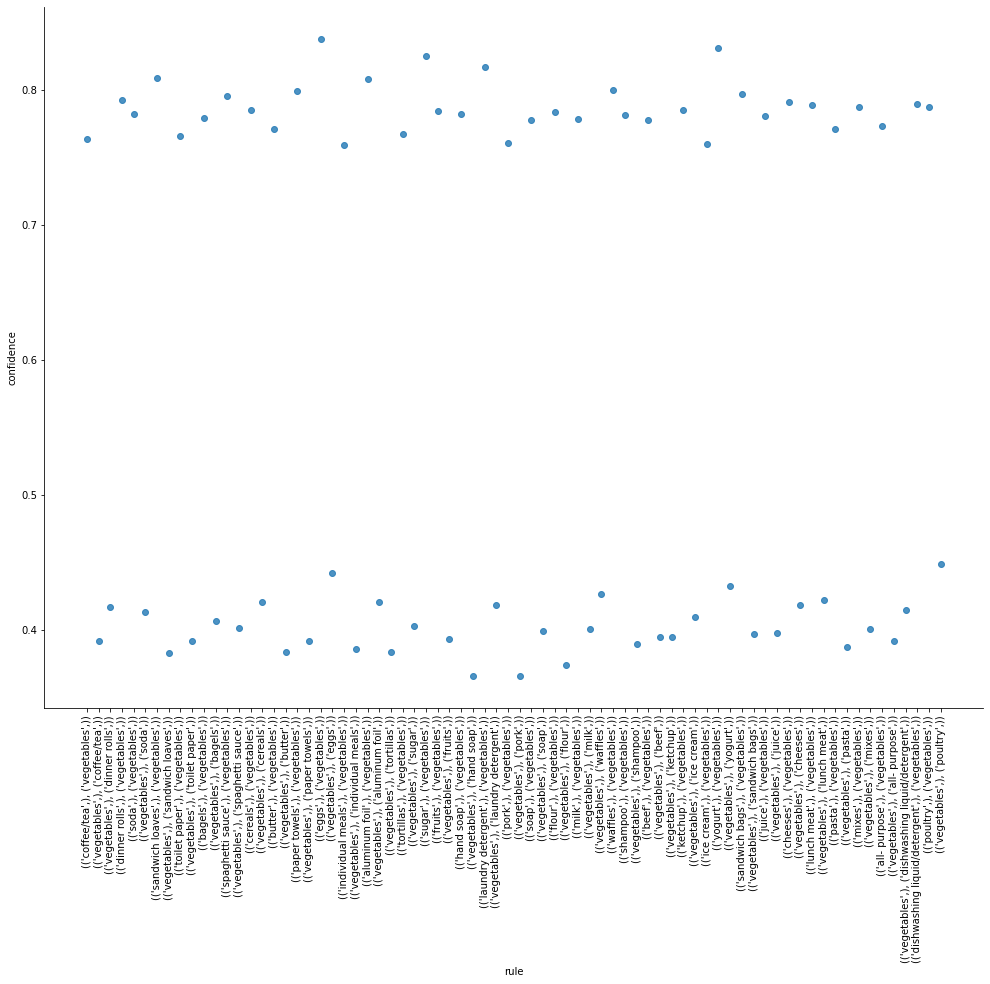

In [8]:
print('visualizing Rule vs Confidence for Task 2 Case 1')
df = DataFrame (rules,columns=['rule','confidence'])
df["rule"] = df["rule"].astype(str)
facet  = sns.lmplot('rule', 'confidence', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()

In [9]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=18 and minimum confidence=40)') 
items, rules = runApriori(new_shoppingCartData, 0.18, 0.40)

print ('Case 2 Reasoning:\nAs the minimum support is decreased compared to before case by which more number frequent items gets selected\nand as the confidence values increased the accuracy of the data increases')
print('The min-confidence is 40% which means that, in a x->y rule, if x item set is already in the basket then there is 40% min-chance that y item set is also added to the basket.\n')

print ('Case 2 Output:')
printResults(items,rules)



# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=18 and minimum confidence=40)
Case 2 Reasoning:
As the minimum support is decreased compared to before case by which more number frequent items gets selected
and as the confidence values increased the accuracy of the data increases
The min-confidence is 40% which means that, in a x->y rule, if x item set is already in the basket then there is 40% min-chance that y item set is also added to the basket.

Case 2 Output:

------------ITEMS-----------------
item: ('poultry', 'yogurt') , 0.181
item: ('poultry', 'cereals') , 0.181
item: ('poultry', 'cheeses') , 0.181
item: ('poultry', 'mixes') , 0.182
item: ('poultry', 'soap') , 0.183
item: ('lunch meat', 'waffles') , 0.184
item: ('poultry', 'lunch meat') , 0.186
item: ('eggs', 'soda') , 0.187
item: ('poultry', 'dishwashing liquid/detergent') , 0.187
item: ('poultry', 'dinner rolls') , 0.195
item: ('hand soap', 'vegetables') , 0.270
item: ('pork', 'vegetables

Case 2 Visualization: Graph & Observations
visualizing Item vs Support for Task 2 Case 2


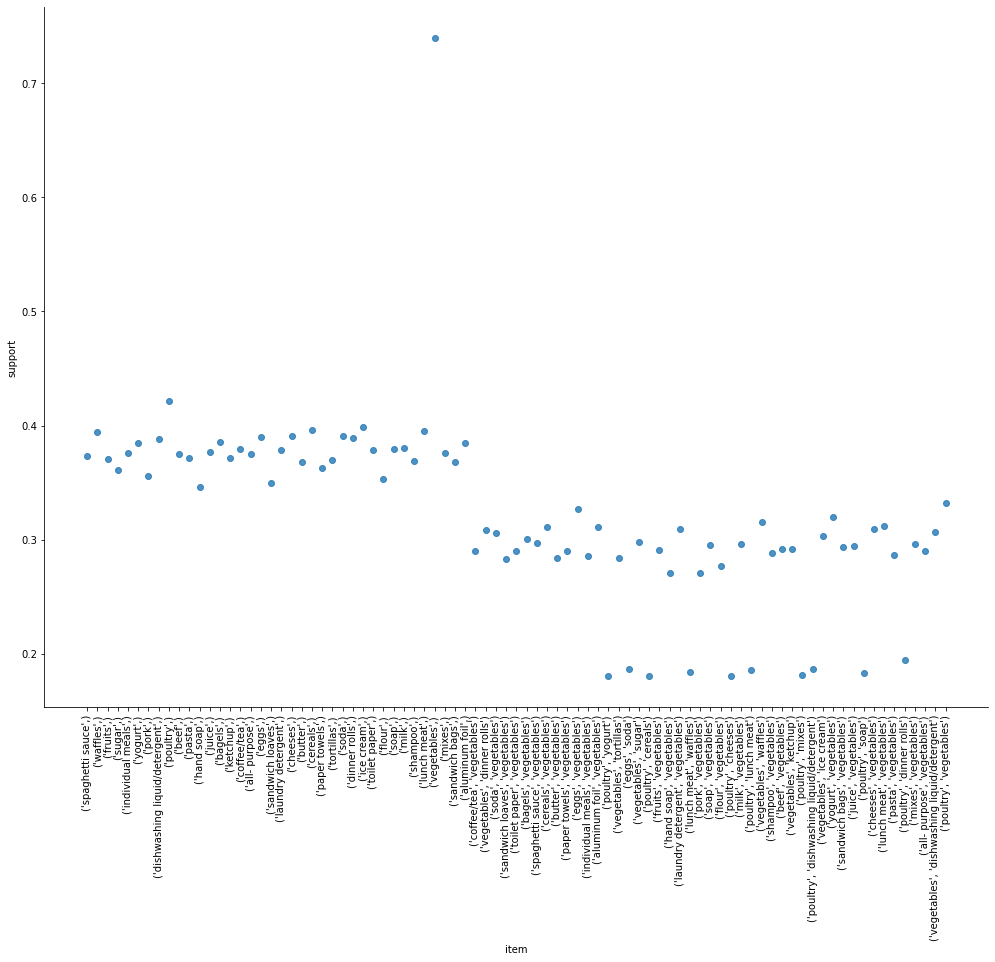

In [10]:
print ('Case 2 Visualization: Graph & Observations')
print('visualizing Item vs Support for Task 2 Case 2')

df = DataFrame (items,columns=['item','support'])
df["item"] = df["item"].astype(str)
facet  = sns.lmplot('item', 'support', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()


visualizing Rule vs Confidence for Task 2 Case 2


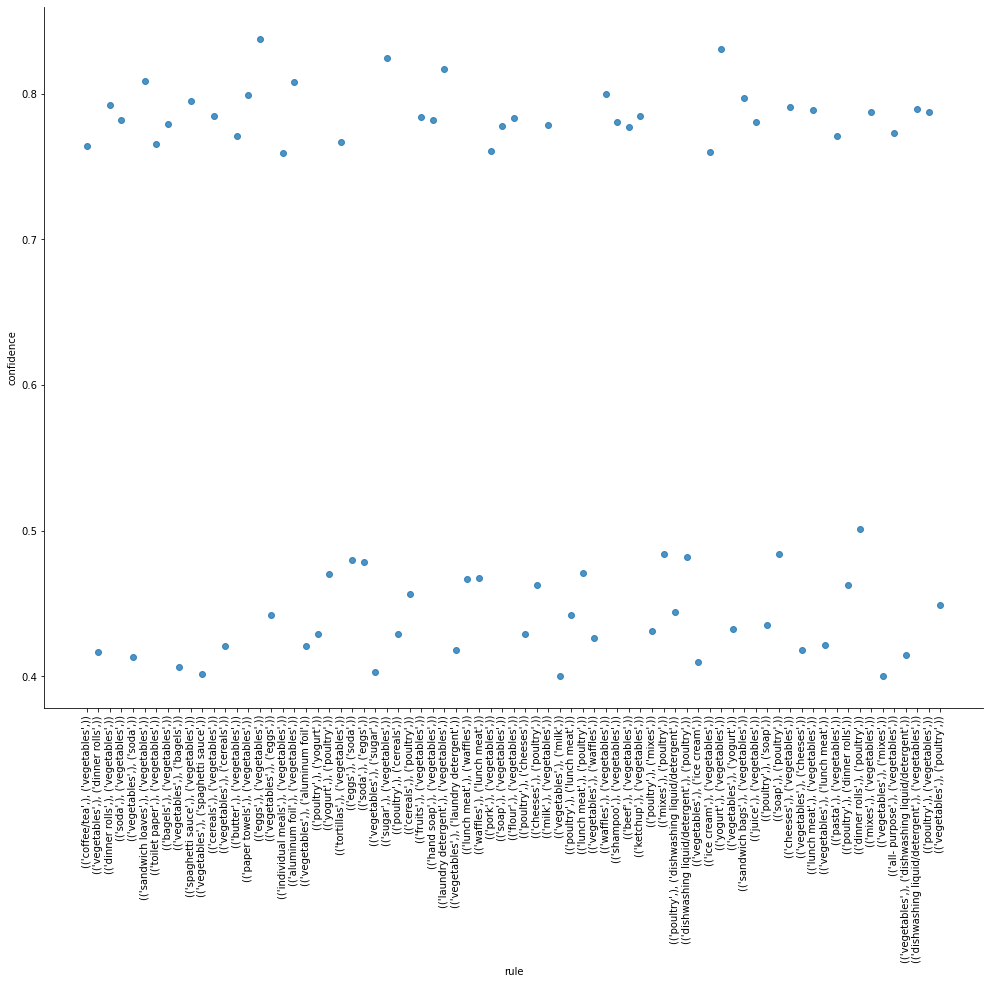

In [11]:
print('visualizing Rule vs Confidence for Task 2 Case 2')
df = DataFrame (rules,columns=['rule','confidence'])
df["rule"] = df["rule"].astype(str)
facet  = sns.lmplot('rule', 'confidence', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()

In [12]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=16 and minimum confidence=50)')
items, rules = runApriori(new_shoppingCartData, 0.15, 0.5)

print ('Case 3 Reasoning:\nIn this minimum support value is decreased further to 15% and minimum confidence is increased to 50%.')
print('As the support values is 15% more number of frequent items gets selected compared to case 1 and case2 \nand as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting\npicked by the customer')
print('We can say that as the confidence value increases, the number of rules decreases and vice versa.In this\ncase, The probability of the item Y being chosen when the item X selected is high.')

print ('Case 3 Output:')

printResults(items,rules)


# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=16 and minimum confidence=50)
Case 3 Reasoning:
In this minimum support value is decreased further to 15% and minimum confidence is increased to 50%.
As the support values is 15% more number of frequent items gets selected compared to case 1 and case2 
and as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting
picked by the customer
We can say that as the confidence value increases, the number of rules decreases and vice versa.In this
case, The probability of the item Y being chosen when the item X selected is high.
Case 3 Output:

------------ITEMS-----------------
item: ('bagels', 'all- purpose') , 0.150
item: ('cheeses', 'juice') , 0.150
item: ('sandwich bags', 'paper towels') , 0.150
item: ('pork', 'cheeses') , 0.150
item: ('fruits', 'paper towels') , 0.150
item: ('shampoo', 'ice cream') , 0.150
item: ('soda', 'fruits') , 0.150
item: ('cereals', 'butter'

Case 3 Visualization: Graph & Observations
visualizing Item vs Support for Task 2 Case 3


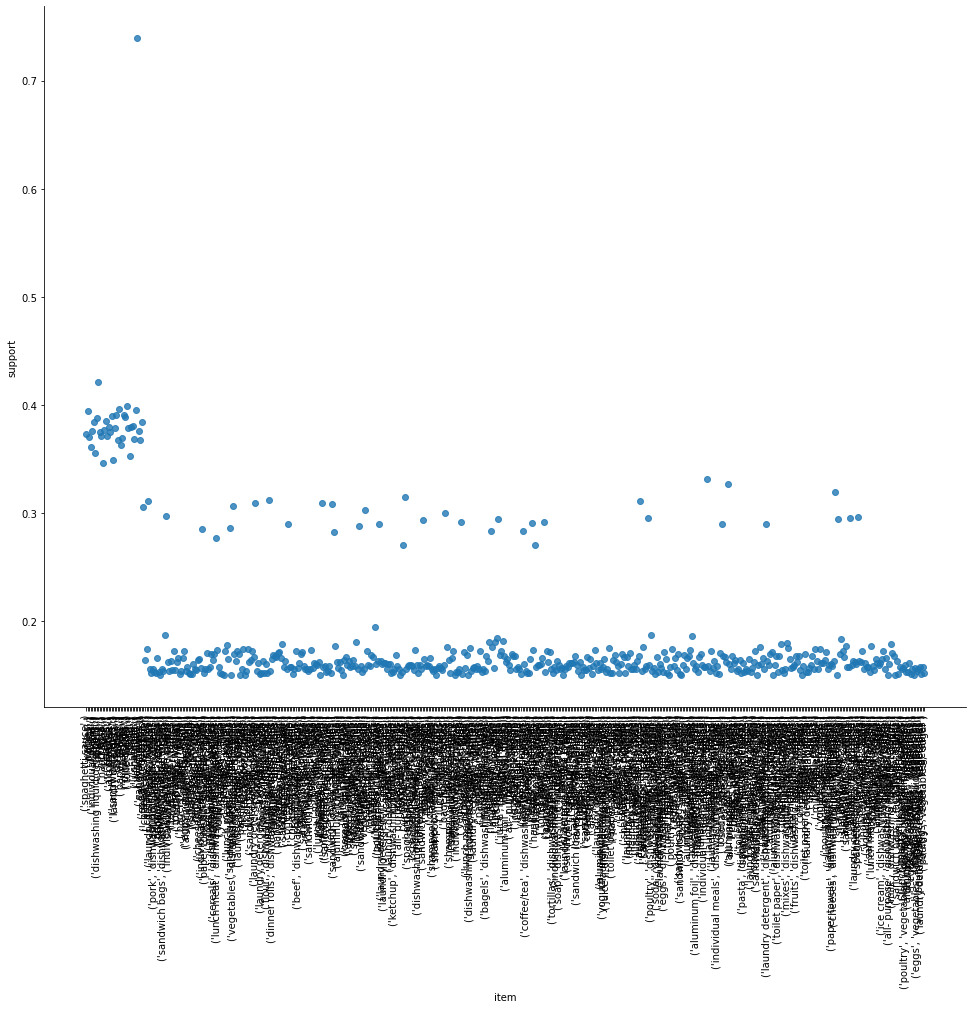

In [13]:
print ('Case 3 Visualization: Graph & Observations')
print('visualizing Item vs Support for Task 2 Case 3')

df = DataFrame (items,columns=['item','support'])
df["item"] = df["item"].astype(str)
facet  = sns.lmplot('item', 'support', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()


visualizing Rule vs Confidence for Task 2 Case 3


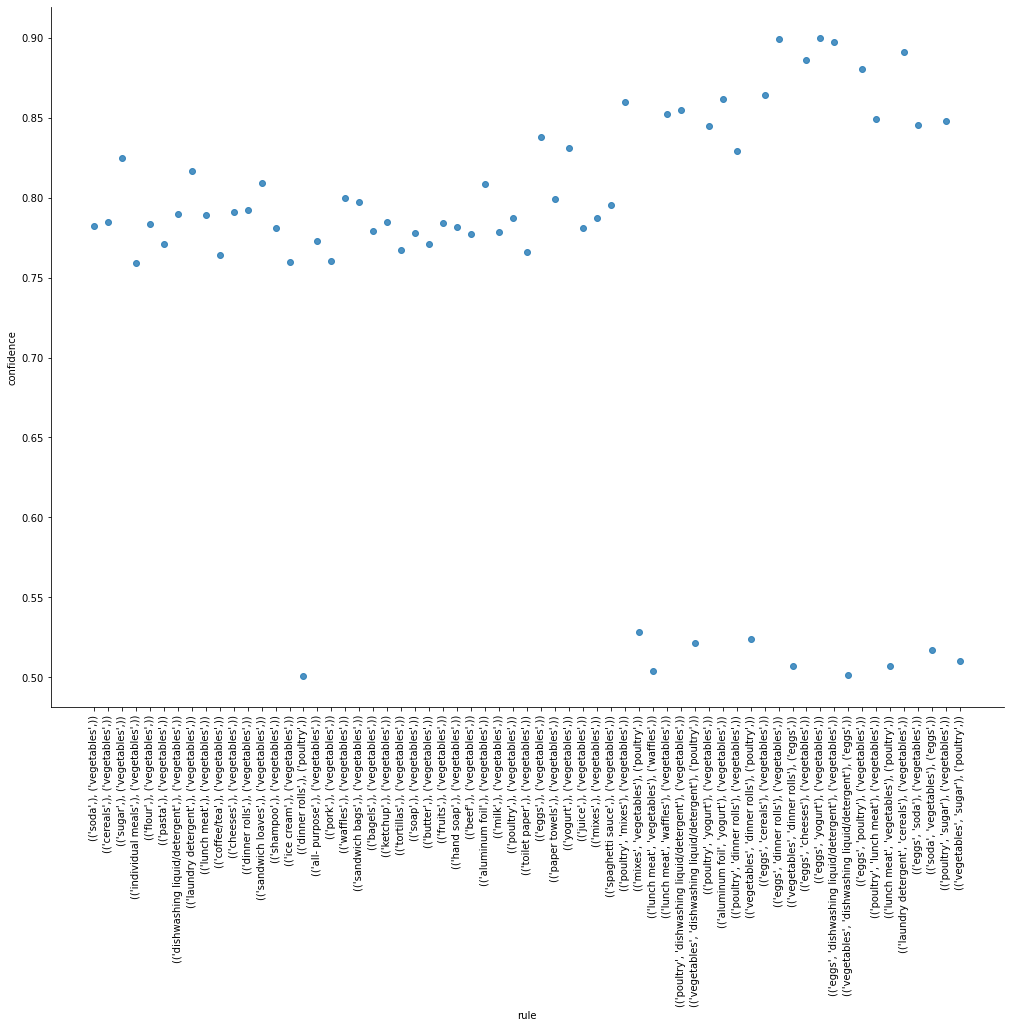

In [14]:
print('visualizing Rule vs Confidence for Task 2 Case 3')
df = DataFrame (rules,columns=['rule','confidence'])
df["rule"] = df["rule"].astype(str)
facet  = sns.lmplot('rule', 'confidence', data=df, fit_reg=False,sharex=False, sharey=False, height=10.27, aspect=11.7/8.27)
facet.set_xticklabels(rotation=90)
plt.show()

# References

[01] https://www.kaggle.com/heeraldedhia/groceries-dataset

[02] https://github.com/asaini/Apriori

[03] https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriori algorithm
* [30 points] - Evaluate Results 
